In [127]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time

import os

%matplotlib inline

plt.style.use(style="tableau-colorblind10")

import time

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [128]:
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [129]:
train = pd.read_csv("nlp-getting-started/train.csv")
test = pd.read_csv("nlp-getting-started/test.csv")

<IPython.core.display.Javascript object>

In [130]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<IPython.core.display.Javascript object>

In [131]:
train["location"].nunique()

3341

<IPython.core.display.Javascript object>

In [132]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<IPython.core.display.Javascript object>

In [133]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

<IPython.core.display.Javascript object>

In [134]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

<IPython.core.display.Javascript object>

In [135]:
Diaster = train[train["target"] == 1]
Non_Disaster = train[train["target"] == 0]

<IPython.core.display.Javascript object>

In [136]:
train["text_len"] = train.text.map(lambda x: len(x))
train["word_count"] = train.text.map(lambda x: len(x.split(" ")))

<IPython.core.display.Javascript object>

In [137]:
train.head()

,id,keyword,location,text,target,text_len,word_count
0,1,-1,-1,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,-1,-1,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,-1,-1,All residents asked to 'shelter in place' are ...,1,133,22
3,6,-1,-1,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,-1,-1,Just got sent this photo from Ruby #Alaska as ...,1,88,17


<IPython.core.display.Javascript object>

In [138]:
import re

f = re.compile("#\S+")
# train["hash_tags"] = [f.findall(i) for i in train["text"]]
train["hash_tags"] = train.text.map(lambda x: f.findall(x))

<IPython.core.display.Javascript object>

In [139]:
test["keyword"].value_counts()[:5]

-1            26
deluged       23
demolished    22
rubble        22
sirens        21
Name: keyword, dtype: int64

<IPython.core.display.Javascript object>

In [140]:
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<IPython.core.display.Javascript object>

In [141]:
train.head()

,id,keyword,location,text,target,text_len,word_count,hash_tags
0,1,-1,-1,Our Deeds are the Reason of this #earthquake M...,1,69,13,[#earthquake]
1,4,-1,-1,Forest fire near La Ronge Sask. Canada,1,38,7,[]
2,5,-1,-1,All residents asked to 'shelter in place' are ...,1,133,22,[]
3,6,-1,-1,"13,000 people receive #wildfires evacuation or...",1,65,9,[#wildfires]
4,7,-1,-1,Just got sent this photo from Ruby #Alaska as ...,1,88,17,"[#Alaska, #wildfires]"


<IPython.core.display.Javascript object>

In [142]:
from collections import Counter

hash_tags = []
for i in train["hash_tags"]:
    for j in i:
        hash_tags.append(j)

print(Counter(hash_tags))

Counter({'#News': 37, '#news': 36, '#hot': 30, '#prebreak': 30, '#best': 30, '#???': 23, '#??': 20, '#Hiroshima': 20, '#GBBO': 17, '#terrorism': 11, '#ISIS': 11, '#NowPlaying': 10, '#nowplaying': 10, '#Japan': 10, '#India': 10, '#Sismo': 10, '#islam': 10, '#RT': 9, '#Directioners': 9, '#jobs': 9, '#CNN': 9, '#yyc': 9, '#BBC': 9, '#earthquake': 8, '#EDM': 8, '#DnB': 8, '#Beyhive': 8, '#world': 8, '#abstorm': 8, '#Nursing': 8, '#Islam': 8, '#Dubstep': 7, '#TrapMusic': 7, '#Dance': 7, '#Ices\x89Û_': 7, '#MTVHottest': 7, '#IranDeal': 7, '#Earthquake': 7, '#WX': 7, '#animalrescue': 7, '#Truth': 7, '#god': 7, '#Quran': 7, '#Lies': 7, '#disaster': 6, '#US': 6, '#Handbag': 6, '#Womens': 6, '#\x89Û_': 6, '#course': 6, '#Rohingya': 6, '#drought': 6, '#ProphetMuhammad': 6, '#okwx': 6, '#Africa': 6, '#Antioch': 6, '#Fukushima': 6, '#Bestnaijamade:': 6, '#wildfires': 5, '#LGBT': 5, '#USA': 5, '#wildfire': 5, '#preparedness': 5, '#job': 5, '#Seattle': 5, '#Emmerdale': 5, '#tcot': 5, '#Fashion': 5, '

<IPython.core.display.Javascript object>

In [143]:
Diaster = train[train["target"] == 1]
Non_Disaster = train[train["target"] == 0]

<IPython.core.display.Javascript object>

In [144]:
from collections import Counter

hash_tags_disaster = []
for i in Diaster["hash_tags"]:
    for j in i:
        hash_tags_disaster.append(j)

print(Counter(hash_tags_disaster))

Counter({'#News': 32, '#???': 23, '#news': 21, '#Hiroshima': 20, '#??': 19, '#hot': 13, '#prebreak': 13, '#best': 13, '#Japan': 10, '#India': 10, '#Sismo': 9, '#yyc': 9, '#earthquake': 8, '#abstorm': 8, '#terrorism': 8, '#ISIS': 8, '#Earthquake': 7, '#WX': 7, '#disaster': 6, '#world': 6, '#Rohingya': 6, '#CNN': 6, '#okwx': 6, '#Africa': 6, '#Antioch': 6, '#BBC': 6, '#Fukushima': 6, '#Bestnaijamade:': 6, '#wildfires': 5, '#wildfire': 5, '#Myanmar': 5, '#Sittwe': 5, '#drought': 5, '#Libya': 5, '#science': 5, '#socialnews': 5, '#hailstorm': 5, '#Islam': 5, '#RockyFire': 4, '#California': 4, '#\x89Û_': 4, '#Zionist': 4, '#Terrorist': 4, '#Phoenix': 4, '#StrategicPatience': 4, '#Genocide;': 4, '#EarthQuake': 4, '#WorldNews': 4, '#GBBO': 4, '#Nuclear': 4, '#Somalia': 4, '#JapÌ_n': 4, '#photography': 4, '#Truth': 4, '#god': 4, '#Quran': 4, '#Lies': 4, '#IDFire': 4, '#flood': 3, '#flooding': 3, '#Manchester': 3, '#Accident': 3, '#KCA': 3, '#VoteJKT48ID': 3, '#NewYork': 3, '#bioterrorism': 3, '

<IPython.core.display.Javascript object>

In [145]:
from collections import Counter

hash_tags_non_disaster = []
for i in Non_Disaster["hash_tags"]:
    for j in i:
        hash_tags_non_disaster.append(j)

print(Counter(hash_tags_non_disaster))

Counter({'#hot': 17, '#prebreak': 17, '#best': 17, '#news': 15, '#GBBO': 13, '#nowplaying': 10, '#jobs': 9, '#NowPlaying': 9, '#EDM': 8, '#DnB': 8, '#Beyhive': 8, '#Directioners': 8, '#RT': 7, '#Dubstep': 7, '#TrapMusic': 7, '#Dance': 7, '#Ices\x89Û_': 7, '#islam': 7, '#animalrescue': 7, '#MTVHottest': 6, '#Nursing': 6, '#Handbag': 5, '#Womens': 5, '#job': 5, '#Seattle': 5, '#Emmerdale': 5, '#Fashion': 5, '#Jobs': 5, '#Job': 5, '#News': 5, '#LGBT': 4, '#kindle': 4, '#fashion': 4, '#IranDeal': 4, '#BlueJays': 4, '#Chemical': 4, '#Dependency': 4, '#business': 4, '#technology': 4, '#course': 4, '#SoundCloud': 4, '#np': 4, '#SummerFate': 4, '#Hiring': 4, '#ProphetMuhammad': 4, '#art': 4, '#Afterlife': 4, '#islam!': 4, '#7': 4, '#RAmag.': 4, '#Models': 4, '#Mayhem': 4, '#nsfw': 3, '#Mets': 3, '#PBBan': 3, '#ARMAGEDDON': 3, '#UltimaLucha': 3, '#US': 3, '#TBT': 3, '#BB17': 3, '#hiring': 3, '#HarryBeCareful': 3, '#cool': 3, '#rockin': 3, '#ArtistsUnited': 3, '#FETTILOOTCH': 3, '#SLANGLUCCI': 3

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='count'>

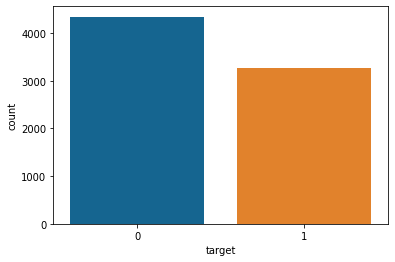

<IPython.core.display.Javascript object>

In [146]:
sns.countplot(data=train, x="target")

In [147]:
train.head()

,id,keyword,location,text,target,text_len,word_count,hash_tags
0,1,-1,-1,Our Deeds are the Reason of this #earthquake M...,1,69,13,[#earthquake]
1,4,-1,-1,Forest fire near La Ronge Sask. Canada,1,38,7,[]
2,5,-1,-1,All residents asked to 'shelter in place' are ...,1,133,22,[]
3,6,-1,-1,"13,000 people receive #wildfires evacuation or...",1,65,9,[#wildfires]
4,7,-1,-1,Just got sent this photo from Ruby #Alaska as ...,1,88,17,"[#Alaska, #wildfires]"


<IPython.core.display.Javascript object>

In [124]:
print(plt.style.available)  # Availble style sheets in Matplotlib

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<IPython.core.display.Javascript object>

In [152]:
plt.style.use(style="seaborn-poster")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='word_count', ylabel='Count'>

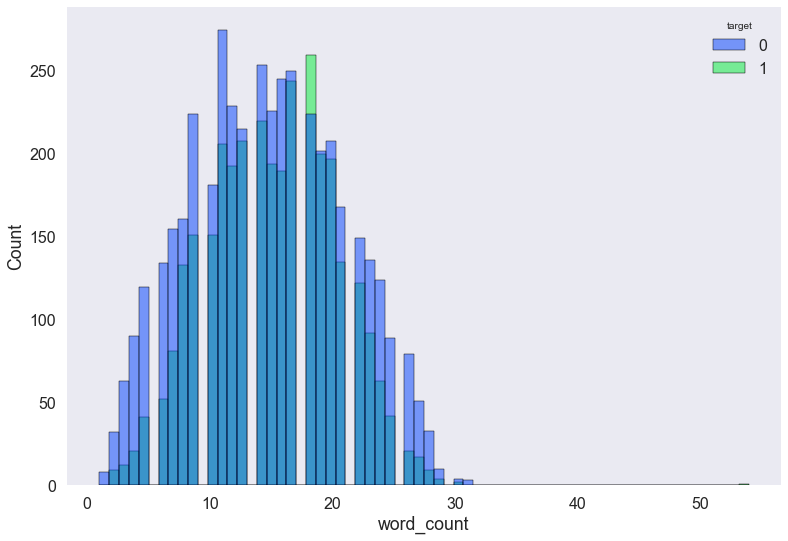

<IPython.core.display.Javascript object>

In [153]:
sns.histplot(data=train, x="word_count", hue="target", color="green")

<AxesSubplot:xlabel='text_len', ylabel='Count'>

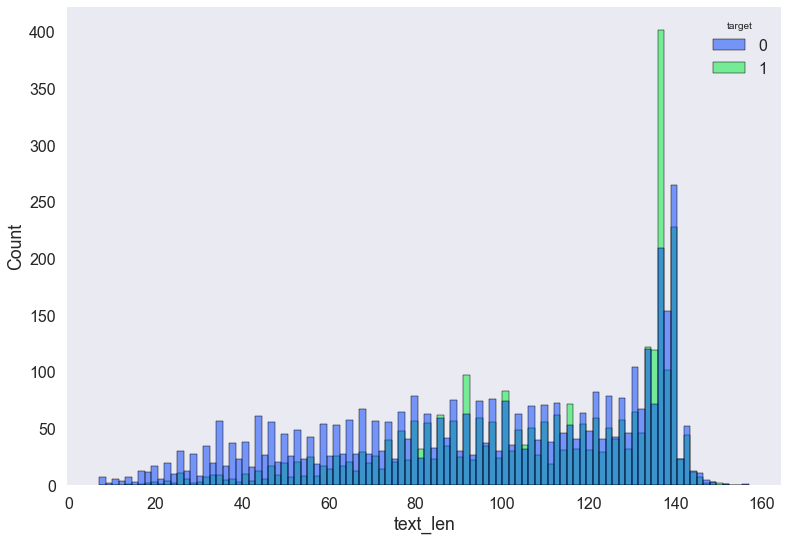

<IPython.core.display.Javascript object>

In [155]:
sns.histplot(data=train, x="text_len", hue="target", bins=100)

In [156]:
print(f"Average no. of words in Diaster tweets : {Diaster['word_count'].mean()}")
print(
    f"Average no. of words in Non-Diaster tweets : {Non_Disaster['word_count'].mean()}"
)

Average no. of words in Diaster tweets : 15.20116172424335
Average no. of words in Non-Diaster tweets : 14.723859972362966


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='word_count'>

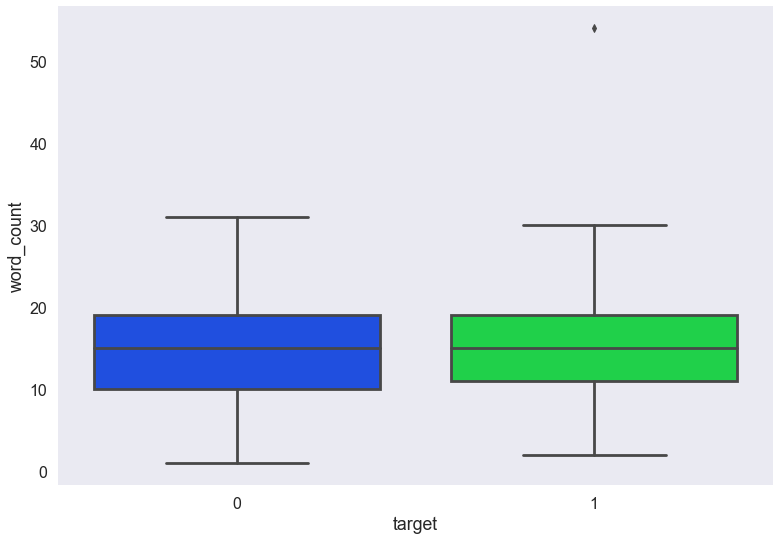

<IPython.core.display.Javascript object>

In [157]:
sns.boxplot(data=train, x="target", y="word_count")

In [81]:
Non_Disaster["location"].value_counts()

-1                 1458
New York             55
USA                  37
London               29
United States        23
                   ... 
seattle wa            1
Rafael castillo       1
Long Beach, CA        1
Belfast               1
Reading UK            1
Name: location, Length: 2143, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='location', ylabel='location'>

C:\Users\shank\Anaconda3\envs\el-dorado\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shank\Anaconda3\envs\el-dorado\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)


ValueError: 
M!$$!$$!PP!
  ^
Expected end of text, found '$'  (at char 2), (line:1, col:3)

<Figure size 921.6x633.6 with 1 Axes>

<IPython.core.display.Javascript object>